In [1]:
import uproot
import awkward as ak
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import hist
import vector
import os
import subprocess
import gc
import pandas as pd
from scipy.optimize import curve_fit
from scipy.integrate import quad
from scipy.interpolate import interp1d
print("uproot version", uproot.__version__)
print("awkward version", ak.__version__)
print("numpy version", np.__version__)
print("matplotlib version", matplotlib.__version__)
print("hist version", hist.__version__)
print("vector version", vector.__version__)
#print("os version", os.__version__)
#print("subprocess version", subprocess.__version__)
#print("gc version", gc.__version__)
print("pandas version", pd.__version__)
#print("scipy.optimize version", scipy.optimize.__version__)
#print("scipy.integrate version", scipy.integrate.__version__)

uproot version 5.0.12
awkward version 2.4.3
numpy version 1.25.2
matplotlib version 3.8.0
hist version 2.7.2
vector version 1.1.1
pandas version 1.5.3


In [2]:
X = [1.5174999999999998, 1.5525, 1.5875, 1.6225, 1.6574999999999998, 1.6925, 1.7275, 1.7625000000000002, 
     1.7975, 1.8325, 1.8675000000000002, 1.9025000000000003, 1.9375, 1.9725, 2.0075, 2.0425, 2.0775, 2.1125, 
     2.1475, 2.1825, 2.2175000000000002, 2.2525, 2.2875, 2.3225, 2.3575, 2.3925, 2.4275, 2.4625, 2.4975, 
     2.5324999999999998, 2.5675, 2.6025, 2.6375, 2.6725000000000003, 2.7075, 2.7424999999999997, 2.7775, 
     2.8125, 2.8475, 2.8825000000000003, 2.9175000000000004, 2.9524999999999997, 2.9875, 3.0225, 3.0575, 
     3.0925, 3.1275, 3.1625, 3.1975, 3.2325, 3.2675, 3.3025, 3.3375, 3.3725000000000005, 3.4074999999999998, 
     3.4425000000000003, 3.4775, 3.5125, 3.5475, 3.5824999999999996, 3.6174999999999997, 3.6525000000000003, 
     3.6875, 3.7224999999999997, 3.7575000000000003, 3.7925000000000004, 3.8275, 3.8625, 3.8975, 
     3.9324999999999997, 3.9675, 4.0024999999999995, 4.0375, 4.0725, 4.1075, 4.1425, 4.1775, 4.2125, 
     4.2475000000000005, 4.2825, 4.3175, 4.352499999999999, 4.3875, 4.422499999999999, 4.4575, 
     4.492500000000001, 4.5275, 4.5625, 4.5975, 4.632499999999999, 4.6675, 4.702500000000001, 4.7375, 
     4.772500000000001, 4.8075, 4.842499999999999, 4.8775, 4.9125, 4.9475, 4.9825]

start = X[0] - (X[1] - X[0])/2
stop = X[-1] + (X[1] - X[0])/2
bins = len(X)

In [3]:
# eventsCuts: isCMUL == True
# tracksCuts: -4.0 < eta < -2.5; pt > 0.5; 2° < thetaAbs < 10°
# pairsCuts: -4.0 < rapidity < -2.5; 2 < pT < 3

Y_OS = [7606.0, 7566.0, 6947.0, 6771.0, 6764.0, 6308.0, 6153.0, 5994.0, 5833.0, 5684.0, 5651.0, 5397.0, 
        5184.0, 5060.0, 4868.0, 4681.0, 4476.0, 4524.0, 4448.0, 4267.0, 3975.0, 4094.0, 4037.0, 3860.0, 
        3939.0, 3773.0, 3769.0, 3630.0, 3592.0, 3528.0, 3407.0, 3421.0, 3357.0, 3150.0, 3166.0, 3118.0, 
        3090.0, 3159.0, 3186.0, 3381.0, 3899.0, 4614.0, 5684.0, 7460.0, 9424.0, 10396.0, 9807.0, 7539.0, 
        4787.0, 3020.0, 2033.0, 1570.0, 1497.0, 1329.0, 1243.0, 1158.0, 1166.0, 1107.0, 1088.0, 1055.0, 
        1046.0, 1027.0, 994.0, 947.0, 948.0, 835.0, 712.0, 733.0, 673.0, 640.0, 642.0, 587.0, 584.0, 
        592.0, 578.0, 543.0, 500.0, 482.0, 446.0, 433.0, 452.0, 419.0, 396.0, 361.0, 357.0, 355.0, 
        368.0, 362.0, 311.0, 318.0, 299.0, 280.0, 291.0, 269.0, 282.0, 260.0, 250.0, 236.0, 243.0, 214.0]

vMass_OS = hist.Hist(hist.axis.Regular(bins = 100, start = 1.5, stop = 5, name='$m_{\mu \mu}$', label = 'X'))
vMass_OS.fill(X, weight = Y_OS)

Y_LS = [1388.0, 1359.0, 1276.0, 1222.0, 1280.0, 1234.0, 1189.0, 1159.0, 1142.0, 1127.0, 1133.0, 
        1052.0, 1069.0, 1030.0, 996.0, 1028.0, 972.0, 987.0, 1006.0, 957.0, 941.0, 1006.0, 969.0, 
        952.0, 917.0, 950.0, 952.0, 921.0, 989.0, 958.0, 905.0, 873.0, 890.0, 908.0, 878.0, 869.0, 
        806.0, 791.0, 747.0, 745.0, 689.0, 693.0, 648.0, 627.0, 578.0, 555.0, 554.0, 509.0, 463.0, 
        516.0, 452.0, 462.0, 384.0, 409.0, 378.0, 388.0, 379.0, 364.0, 347.0, 307.0, 315.0, 300.0, 
        303.0, 297.0, 252.0, 237.0, 240.0, 231.0, 252.0, 215.0, 215.0, 202.0, 226.0, 190.0, 200.0, 
        187.0, 174.0, 160.0, 175.0, 172.0, 163.0, 141.0, 139.0, 136.0, 132.0, 138.0, 105.0, 120.0, 
        114.0, 129.0, 112.0, 134.0, 114.0, 80.0, 93.0, 89.0, 84.0, 87.0, 76.0, 82.0]

vMass_LS = hist.Hist(hist.axis.Regular(bins = 100, start = 1.5, stop = 5, name='$m_{\mu \mu}$', label = 'X'))
vMass_LS.fill(X, weight = Y_LS)

Y_JPsi = [26.0, 12.0, 20.0, 26.0, 34.0, 42.0, 27.0, 47.0, 32.0, 54.0, 49.0, 61.0, 51.0, 68.0, 72.0, 
          88.0, 90.0, 109.0, 108.0, 126.0, 148.0, 111.0, 156.0, 155.0, 160.0, 193.0, 216.0, 263.0, 
          308.0, 300.0, 372.0, 407.0, 558.0, 672.0, 824.0, 981.0, 1247.0, 1663.0, 2268.0, 2988.0, 
          4180.0, 6267.0, 9392.0, 14687.0, 21565.0, 27242.0, 26449.0, 18157.0, 8642.0, 3369.0, 
          1120.0, 451.0, 257.0, 165.0, 87.0, 67.0, 59.0, 31.0, 37.0, 22.0, 14.0, 16.0, 17.0, 7.0, 
          6.0, 9.0, 7.0, 2.0, 4.0, 6.0, 7.0, 3.0, 3.0, 2.0, 1.0, 2.0, 3.0, 1.0, 1.0, 3.0, 2.0, 1.0, 
          1.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]

vMass_JPsi = hist.Hist(hist.axis.Regular(bins = 100, start = 1.5, stop = 5, name='$m_{\mu \mu}$', label = 'X'))
vMass_JPsi.fill(X, weight = Y_JPsi)

Y_Psi = [5.0, 6.0, 6.0, 7.0, 7.0, 7.0, 5.0, 14.0, 8.0, 15.0, 7.0, 11.0, 15.0, 19.0, 16.0, 16.0, 17.0, 
         20.0, 19.0, 19.0, 20.0, 31.0, 28.0, 33.0, 35.0, 35.0, 38.0, 42.0, 43.0, 53.0, 39.0, 66.0, 60.0, 
         67.0, 62.0, 68.0, 94.0, 72.0, 84.0, 130.0, 101.0, 124.0, 131.0, 161.0, 162.0, 191.0, 227.0, 
         253.0, 288.0, 350.0, 462.0, 533.0, 633.0, 814.0, 1069.0, 1394.0, 1770.0, 2330.0, 3391.0, 5149.0, 
         7954.0, 11400.0, 14239.0, 13428.0, 9336.0, 4507.0, 1703.0, 634.0, 231.0, 126.0, 76.0, 49.0, 34.0, 
         23.0, 17.0, 13.0, 20.0, 10.0, 6.0, 3.0, 4.0, 6.0, 5.0, 4.0, 2.0, 2.0, 4.0, 1.0, 2.0, 3.0, 1.0, 
         0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]

vMass_Psi = hist.Hist(hist.axis.Regular(bins = 100, start = 1.5, stop = 5, name='$m_{\mu \mu}$', label = 'X'))
vMass_Psi.fill(X, weight = Y_Psi)

Y_MC = [31.0, 18.0, 26.0, 33.0, 41.0, 49.0, 32.0, 61.0, 40.0, 69.0, 56.0, 72.0, 66.0, 87.0, 88.0, 104.0, 
        107.0, 129.0, 127.0, 145.0, 168.0, 142.0, 184.0, 188.0, 195.0, 228.0, 254.0, 305.0, 351.0, 353.0, 
        411.0, 473.0, 618.0, 739.0, 886.0, 1049.0, 1341.0, 1735.0, 2352.0, 3118.0, 4281.0, 6391.0, 9523.0, 
        14848.0, 21727.0, 27433.0, 26676.0, 18410.0, 8930.0, 3719.0, 1582.0, 984.0, 890.0, 979.0, 1156.0, 
        1461.0, 1829.0, 2361.0, 3428.0, 5171.0, 7968.0, 11416.0, 14256.0, 13435.0, 9342.0, 4516.0, 1710.0, 
        636.0, 235.0, 132.0, 83.0, 52.0, 37.0, 25.0, 18.0, 15.0, 23.0, 11.0, 7.0, 6.0, 6.0, 7.0, 6.0, 7.0, 
        2.0, 2.0, 4.0, 1.0, 2.0, 3.0, 1.0, 1.0, 2.0, 3.0, 2.0, 0.0, 0.0, 1.0, 0.0, 0.0]

vMass_MC = hist.Hist(hist.axis.Regular(bins = 100, start = 1.5, stop = 5, name='$m_{\mu \mu}$', label = 'X'))
vMass_MC.fill(X, weight = Y_MC)

Hist(Regular(100, 1.5, 5, name='$m_{\\mu \\mu}$', label='X'), storage=Double()) # Sum: 242223.0

In [4]:
def CB2(x, N, mu, sig, alphaL, nL, alphaR, nR):
    AL = ( nL / np.absolute( alphaL ) )**nL * np.exp( -1 * np.absolute( alphaL )**2 / 2 )
    AR = ( nR / np.absolute( alphaR ) )**nR * np.exp( -1 * np.absolute( alphaR )**2 / 2 )
    BL = nL / np.absolute( alphaL ) - np.absolute( alphaL )
    BR = nR / np.absolute( alphaR ) - np.absolute( alphaR )

    return np.piecewise(x, 
                        [( x - mu )/sig < -1 * alphaL, (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , ( x - mu )/sig > alphaR],
                        [lambda x: N * AL * (BL - (( x - mu )/sig))**(-nL), lambda x: N * np.exp(-1 * (( x - mu )/sig)**2 / 2), lambda x: N * AR * (BR + ( x - mu )/sig)**(-nR)])

def NA60(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R):
    return np.piecewise(x, 
                        [(x - mu)/sig < alphaL, 
                         ((x - mu)/sig >= alphaL) & ((x - mu)/sig <= alphaR).any() , 
                         (x - mu)/sig > alphaR],
                        [lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2 / (1 + p1L * (alphaL - (x - mu)/sig)**(p2L - p3L * np.sqrt(alphaL - (x - mu)/sig)))**2), 
                         lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2), 
                         lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2 / (1 + p1R * ((x - mu)/sig - alphaR)**(p2R - p3R * np.sqrt((x - mu)/sig - alphaR)))**2)])

def VWG(x, N, mu, alpha, beta):
    sigma = alpha + beta*((x-mu)/mu)
    return N * np.exp(-(x - mu)**2 / (2*sigma**2))

def PR(x, N, a1, b1, b2):
    return N * (1 + a1*x) / (b1*x + b2*x)

def DE(x, N, alpha, beta1, beta2):
    return N * (np.exp(beta1*x) + alpha * np.exp(beta2*x))

def test(x, y1, y2, y3, y4, y5):
    x0 = [1.5, 2.5, 3.45, 3.8, 5]
    return interp1d([*x0], [y1, y2, y3, y4, y5], kind = 'cubic', bounds_error = False, fill_value = "extrapolate")(x)

def test2(x, y1, y2, y3, y4, y5):
    return np.exp(test(x, y1, y2, y3, y4, y5))

In [5]:
def fixedFunc_JPsi(x, N1, mu1, sig1):
    return func_JPsi(x, N1, mu1, sig1, alphaL1, nL1, alphaR1, nR1)

def fixedFunc_Psi(x, N2, mu2, sig2):
    return func_Psi(x, N2, mu2, sig2, alphaL2, nL2, alphaR2, nR2)

def fixedFunc_MC(x, N1, mu1, sig1, N2, mu2, sig2):
    return fixedFunc_JPsi(x, N1, mu1, sig1) + fixedFunc_Psi(x, N2, mu2, sig2)

def fixedFunc_bckg(x, y1, y2, y3, y4, y5):
    return func_bckg(x, y1, y2, y3, y4, y5)

def fixedFitFunc(x,
                 N1, mu1, sig1,
                 N2, mu2, sig2,
                y1, y2, y3, y4, y5):
    return fixedFunc_JPsi(x, N1, mu1, sig1) + fixedFunc_Psi(x, N2, mu2, sig2) + fixedFunc_bckg(x, y1, y2, y3, y4, y5)

condition_x_range = lambda x_data: (x_data > 2.0)
func_JPsi = CB2
func_Psi = CB2
func_bckg = test2
func_MC = fixedFunc_MC
func = fixedFitFunc

In [6]:
x_data = np.array(X)
y_data = np.array(vMass_JPsi)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

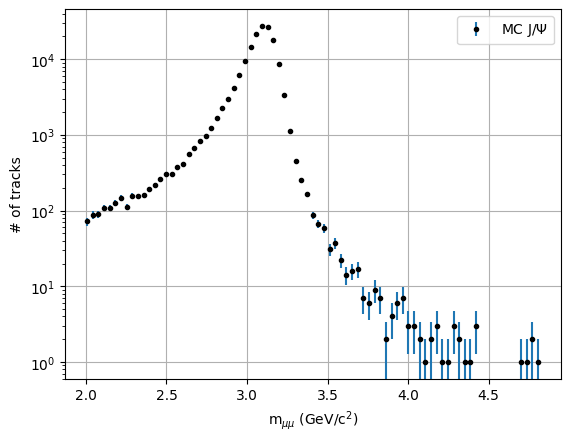

In [7]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC J/$\Psi$')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [8]:
p0_JPsi = np.array([136241.85680339273, 3.1003675365856544, 0.0630318569252801, 0.993869592186634, 3.0340276033125493, 2.233482641523906, 2.705629560440874])

In [9]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_JPsi, pcov_JPsi, nfev_JPsi, fvec_JPsi, fjac_JPsi = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_JPsi, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_JPsi))
print("pcov: \n", pcov_JPsi)
print("residual: \n", nfev_JPsi)

popt: 
 [28151.616120000097, 3.1006688806950646, 0.06408786223843216, 0.946385059753221, 3.4124472142944446, 2.265019166689793, 2.7863365713339534]
pcov: 
 [[ 5.04638721e+04  3.77912012e-02 -7.87605692e-02 -4.31469975e-01
  -5.62773446e-01 -2.33887647e+00  5.28820808e+00]
 [ 3.77912012e-02  4.36363343e-07 -2.49338429e-07 -8.78154696e-06
   3.61095500e-05 -4.60047753e-06  5.31920828e-06]
 [-7.87605692e-02 -2.49338429e-07  3.40063261e-07  7.40715952e-06
  -2.37061800e-05  1.26302035e-05 -2.59901754e-05]
 [-4.31469975e-01 -8.78154696e-06  7.40715952e-06  4.13392626e-04
  -2.26612251e-03  2.45254152e-04 -4.44915062e-04]
 [-5.62773446e-01  3.61095500e-05 -2.37061800e-05 -2.26612251e-03
   1.69756223e-02 -6.78643970e-04  1.06790618e-03]
 [-2.33887647e+00 -4.60047753e-06  1.26302035e-05  2.45254152e-04
  -6.78643970e-04  3.15694449e-03 -1.07822146e-02]
 [ 5.28820808e+00  5.31920828e-06 -2.59901754e-05 -4.44915062e-04
   1.06790618e-03 -1.07822146e-02  5.18491876e-02]]
residual: 
 {'nfev': 8, 

fit error : 224.64181377103395


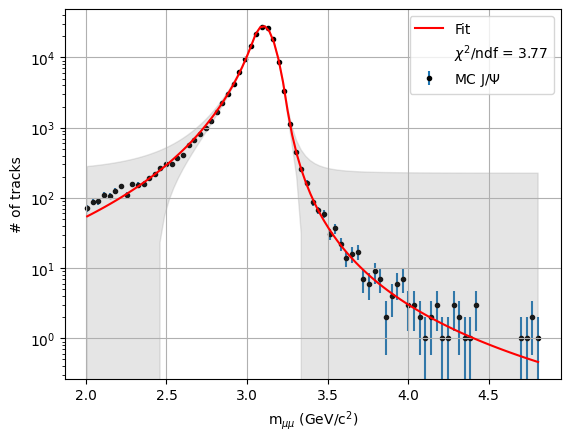

In [10]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC J/$\Psi$', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_JPsi(x_fit, *popt_JPsi)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_JPsi)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_JPsi(x_data, *popt_JPsi)) / y_error) ** 2)
ndf = len(x_data) + len(popt_JPsi) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

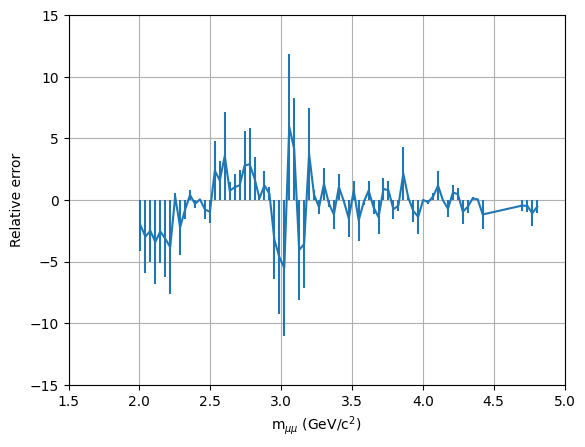

In [11]:
err = np.sqrt(nfev_JPsi["fvec"]**2/(nfev_JPsi["nfev"]-len(popt_JPsi)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_JPsi["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [12]:
x_data = np.array(X)
y_data = np.array(vMass_Psi)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

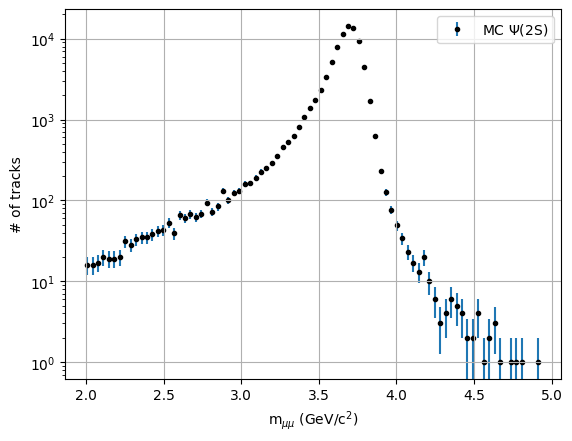

In [13]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC $\Psi$(2S)', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [14]:
p0_Psi = np.array([67449.51297432544, 3.693248662583962, 0.06511527893660865, 0.9607870324016564, 2.849198115287005, 2.283717751711943, 2.5497581009488974])

In [15]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_Psi, pcov_Psi, nfev_Psi, fvec_Psi, fjac_Psi = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_Psi, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_Psi))
print("pcov: \n", pcov_Psi)
print("residual: \n", nfev_Psi)

popt: 
 [14551.86042386718, 3.6938433041957004, 0.06520648918604383, 0.9403629394486404, 2.9420719848984316, 2.2783695752134103, 2.836073455534764]
pcov: 
 [[ 1.18160016e+04  1.73827341e-02 -3.61619043e-02 -1.57276015e-01
  -1.80703945e-01 -1.13088452e+00  2.84753206e+00]
 [ 1.73827341e-02  3.92913739e-07 -2.23352555e-07 -6.85324688e-06
   1.91145948e-05 -4.20961335e-06  5.57518523e-06]
 [-3.61619043e-02 -2.23352555e-07  3.05695774e-07  5.81842164e-06
  -1.24401380e-05  1.18746082e-05 -2.74070428e-05]
 [-1.57276015e-01 -6.85324688e-06  5.81842164e-06  2.85349795e-04
  -1.06313675e-03  2.02249002e-04 -4.15450530e-04]
 [-1.80703945e-01  1.91145948e-05 -1.24401380e-05 -1.06313675e-03
   5.59595438e-03 -3.67037425e-04  6.53384679e-04]
 [-1.13088452e+00 -4.20961335e-06  1.18746082e-05  2.02249002e-04
  -3.67037425e-04  3.19196519e-03 -1.21195467e-02]
 [ 2.84753206e+00  5.57518523e-06 -2.74070428e-05 -4.15450530e-04
   6.53384679e-04 -1.21195467e-02  6.29842514e-02]]
residual: 
 {'nfev': 8, 

fit error : 108.70176465570415


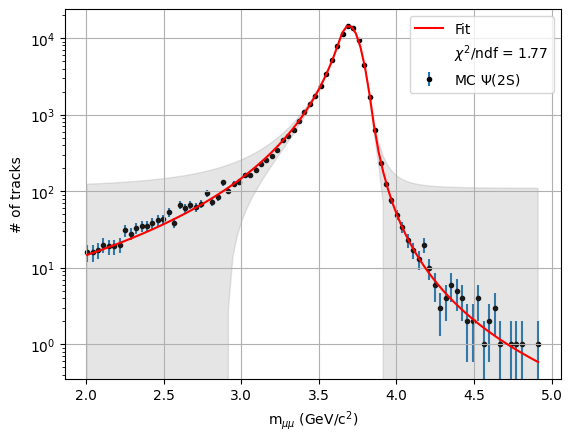

In [16]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC $\Psi$(2S)', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_Psi(x_fit, *popt_Psi)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_Psi)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_Psi(x_data, *popt_Psi)) / y_error) ** 2)
ndf = len(x_data) + len(popt_Psi) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

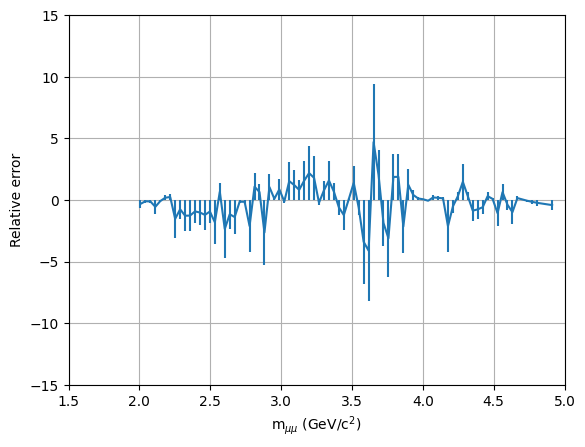

In [17]:
err = np.sqrt(nfev_Psi["fvec"]**2/(nfev_Psi["nfev"]-len(popt_Psi)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_Psi["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [18]:
x_data = np.array(X)
y_data = np.array(vMass_MC)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

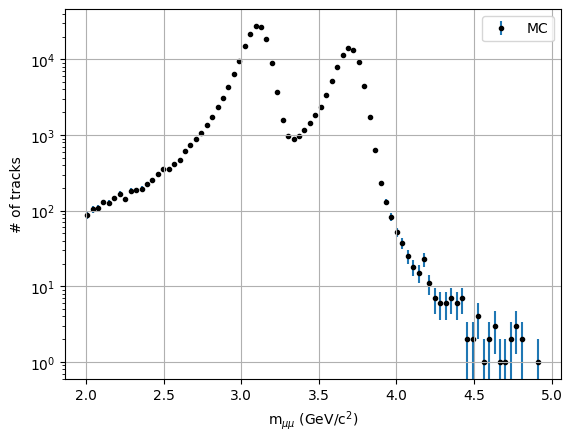

In [19]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [20]:
N1 = popt_JPsi[0]
mu1 = popt_JPsi[1]
sig1 = popt_JPsi[2]
alphaL1 = popt_JPsi[3]
nL1 = popt_JPsi[4]
alphaR1= popt_JPsi[5]
nR1 = popt_JPsi[6]

N2 = popt_Psi[0]
mu2 = popt_Psi[1]
sig2 = popt_Psi[2]
alphaL2 = popt_Psi[3]
nL2 = popt_Psi[4]
alphaR2 = popt_Psi[5]
nR2 = popt_Psi[6]

p0_MC = np.array([N1, mu1, sig1, N2, mu2, sig2])

In [21]:
def mklb(p0, var):
    return p0*(1-np.sign(p0)*var)

def mkub(p0, var):
    return p0*(1+np.sign(p0)*var)

varpks = np.array([1, 0.1, 0.1])  # peaks parameters variation factor around p0
lb = np.array([*mklb(p0_MC[:3],varpks), *mklb(p0_MC[3:6],varpks)])
ub = np.array([*mkub(p0_MC[:3],varpks), *mkub(p0_MC[3:6],varpks)])
bounds = (lb,ub)

In [22]:
#popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
#popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_MC, method = 'trf', full_output = True)
popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_MC, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_MC))
print("pcov: \n", pcov_MC)
print("residual: \n", nfev_MC)

popt: 
 [28123.626701643, 3.1005204283866084, 0.06412799105803237, 14540.206347468627, 3.693691939211289, 0.06538083021990286]
pcov: 
 [[ 5.00449902e+04  2.27174321e-02 -6.22254831e-02 -1.88591425e+02
  -2.17491139e-03  2.71413642e-03]
 [ 2.27174321e-02  2.32140175e-07 -5.22627155e-08  1.01713831e-04
   3.12136650e-09 -2.67235667e-09]
 [-6.22254831e-02 -5.22627155e-08  1.51316536e-07  1.70665014e-03
   1.56391324e-08 -2.12345678e-08]
 [-1.88591425e+02  1.01713831e-04  1.70665014e-03  2.51417894e+04
   2.81409303e-02 -6.37542785e-02]
 [-2.17491139e-03  3.12136650e-09  1.56391324e-08  2.81409303e-02
   4.77843735e-07 -1.49694221e-07]
 [ 2.71413642e-03 -2.67235667e-09 -2.12345678e-08 -6.37542785e-02
  -1.49694221e-07  3.18985009e-07]]
residual: 
 {'nfev': 5, 'fvec': array([-1.97189458, -2.75845111, -2.31603112, -3.33208918, -2.36357481,
       -2.8349838 , -3.48078728, -0.44349664, -2.30674906, -1.2174447 ,
       -0.13903271, -0.61856658, -0.31375662, -1.13247163, -1.18393668,
        1.

fit error : 274.2020780866565


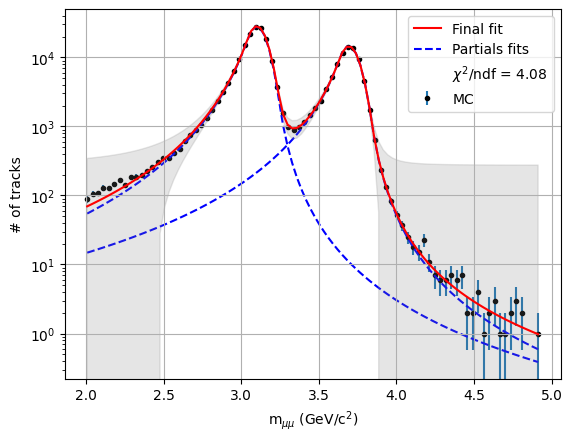

In [23]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_MC(x_fit, *popt_MC)
plt.plot(x_fit, y_fit, '-r', label = 'Final fit')
plt.plot(x_fit, fixedFunc_JPsi(x_fit, *popt_MC[:3]), '--b', zorder = 1, label = 'Partials fits')
plt.plot(x_fit, fixedFunc_Psi(x_fit, *popt_MC[3:6]), '--b', zorder = 1)

sigmas = np.diag(pcov_MC)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_MC(x_data, *popt_MC)) / y_error) ** 2)
ndf = len(x_data) + len(popt_MC) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

/tmp/ipykernel_7952/4254452161.py:1: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(nfev_MC["fvec"]**2/(nfev_MC["nfev"]-len(popt_MC)))


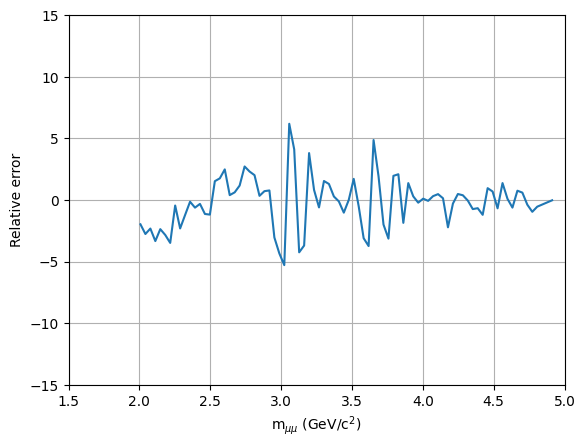

In [24]:
err = np.sqrt(nfev_MC["fvec"]**2/(nfev_MC["nfev"]-len(popt_MC)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_MC["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [25]:
x_data = np.array(X)
y_data = np.array(vMass_LS)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

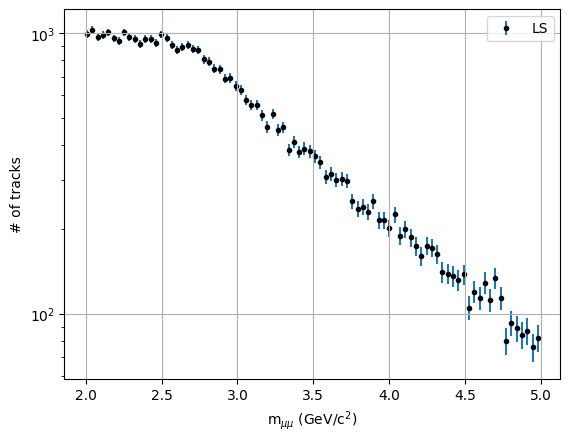

In [26]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'LS', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [27]:
p0_bckg = np.array([1,1,1,1,1])

In [28]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_bckg, pcov_bckg, nfev_bckg, fvec_bckg, fjac_bckg = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_bckg, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_bckg))
print("pcov: \n", pcov_bckg)
print("residual: \n", nfev_bckg)

popt: 
 [6.1582398476641105, 6.850552299264028, 5.938888587808748, 5.553617416181681, 4.366600774255434]
pcov: 
 [[ 8.67377371e-03 -5.13808005e-04  5.69426066e-04  2.37081316e-04
   1.30993783e-03]
 [-5.13808005e-04  8.18409323e-05 -2.94805701e-05 -2.03978331e-05
  -6.64450334e-05]
 [ 5.69426066e-04 -2.94805701e-05  1.43381762e-04  1.01603858e-04
   7.60056880e-05]
 [ 2.37081316e-04 -2.03978331e-05  1.01603858e-04  1.59612783e-04
  -2.18354923e-04]
 [ 1.30993783e-03 -6.64450334e-05  7.60056880e-05 -2.18354923e-04
   3.10221313e-03]]
residual: 
 {'nfev': 14, 'fvec': array([-1.8746946 , -2.28345218, -0.06390098, -0.1450658 , -0.43936655,
        1.35360657,  2.01789119, -0.05691037,  1.08692105,  1.52055989,
        2.49506403,  1.09936663,  0.68220829,  1.29185632, -1.38266152,
       -0.93188747,  0.20929605,  0.64683008, -0.61084818, -1.90944231,
       -1.67605776, -2.1520758 , -0.8353318 , -1.14992425, -0.44571926,
       -1.24969848, -0.07649359, -1.13078532, -0.32576348, -0.419126

fit error : 0.11027611854160982


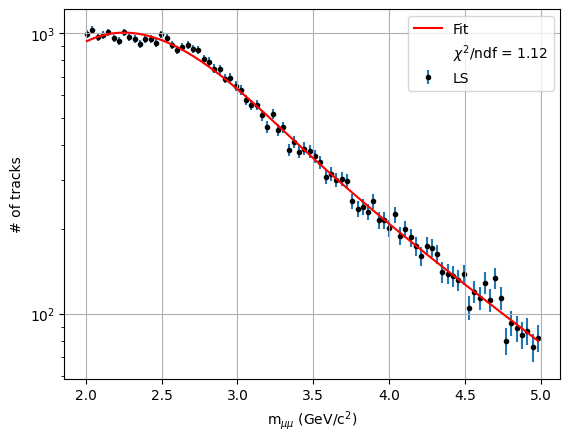

In [29]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'LS', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_bckg(x_fit, *popt_bckg)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_bckg)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_bckg(x_data, *popt_bckg)) / y_error) ** 2)
ndf = len(x_data) + len(popt_bckg) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

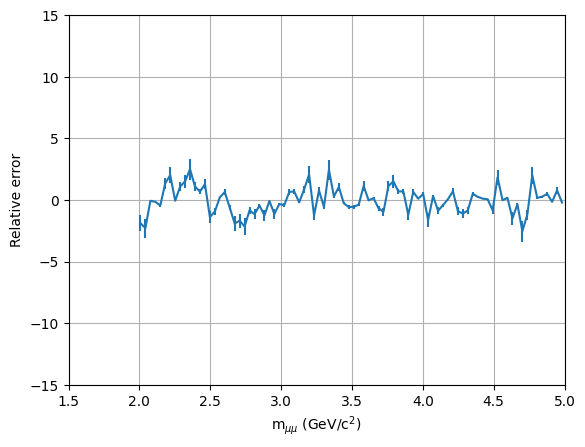

In [30]:
err = np.sqrt(nfev_bckg["fvec"]**2/(nfev_bckg["nfev"]-len(popt_bckg)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_bckg["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [31]:
x_data = np.array(X)
y_data = np.array(vMass_OS)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

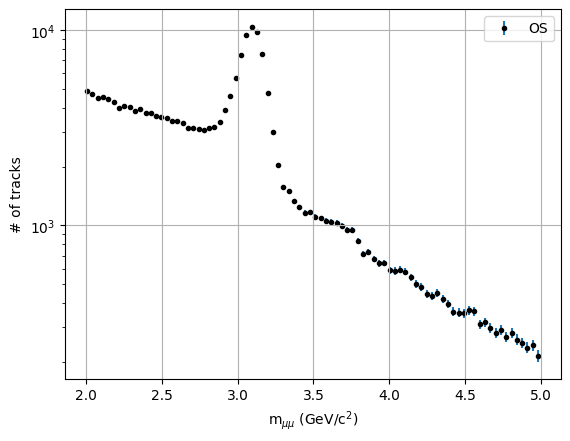

In [32]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'OS', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [33]:
N1 = popt_JPsi[0]
mu1 = popt_JPsi[1]
sig1 = popt_JPsi[2]
alphaL1 = popt_JPsi[3]
nL1 = popt_JPsi[4]
alphaR1 = popt_JPsi[5]
nR1 = popt_JPsi[6]

N2 = popt_Psi[0]
mu2 = popt_Psi[1]
sig2 = popt_Psi[2]
alphaL2 = popt_Psi[3]
nL2 = popt_Psi[4]
alphaR2 = popt_Psi[5]
nR2 = popt_Psi[6]

y1 = popt_bckg[0]
y2 = popt_bckg[1]
y3 = popt_bckg[2]
y4 = popt_bckg[3]
y5 = popt_bckg[4]

p0 = np.array([N1, mu1, sig1, N2, mu2, sig2,  y1, y2, y3, y4, y5])

In [34]:
varbg = np.ones(np.shape(p0[6:]))*1# bg parameters variation factor around p0
varpks = np.array([1, 0.1, 0.1])  # peaks parameters variation factor around p0
lb = np.array([*mklb(p0[:3],varpks), *mklb(p0[3:6],varpks), *mklb(p0[6:],varbg)])
ub = np.array([*mkub(p0[:3],varpks), *mkub(p0[3:6],varpks), *mkub(p0[6:],varbg)])
bounds = (lb,ub)

In [35]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, method = 'trf', full_output = True)
popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt))
print("pcov: \n", pcov)
print("residual: \n", nfev)

popt: 
 [8944.24074351252, 3.096077104045073, 0.07049664846227537, 129.15456658799695, 3.703818294820948, 0.06096926184202669, 8.45566905361983, 8.131788437355457, 7.070566902603917, 6.6467502897105675, 5.420931893668532]
pcov: 
 [[ 7.92970001e+03  1.08834791e-02 -3.73571166e-02  6.00098031e+01
  -5.19075681e-02  1.02690482e-01 -3.60930788e-01  9.33960978e-03
  -1.45000914e-01 -8.48672965e-02 -1.20075945e-01]
 [ 1.08834791e-02  5.55588296e-07 -2.03109470e-07 -1.44134551e-04
   3.30391871e-07 -5.50559033e-07 -4.23583490e-06  1.04598805e-06
   8.91405163e-07  2.70639308e-07  8.32336103e-07]
 [-3.73571166e-02 -2.03109470e-07  6.65934174e-07  2.66586952e-03
  -1.65475451e-06  3.36816684e-06 -5.07095458e-06 -1.65148320e-06
  -6.15684265e-06 -3.54567461e-06 -4.05219219e-06]
 [ 6.00098031e+01 -1.44134551e-04  2.66586952e-03  1.03679014e+03
   4.04509699e-02 -2.73385247e-01 -2.60027644e-01  3.12362591e-03
  -1.20676000e-01 -1.08544300e-01  2.77217885e-02]
 [-5.19075681e-02  3.30391871e-07 -1.6

fit error : 94.69159156447435


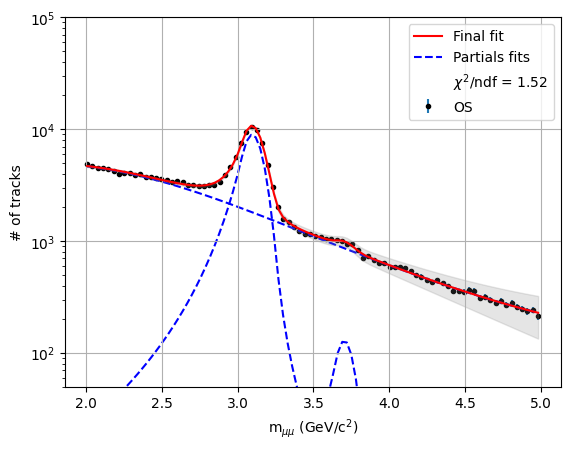

In [36]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'OS', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func(x_fit, *popt)
plt.plot(x_fit, y_fit, '-r', zorder = 2, label = 'Final fit')
plt.plot(x_fit, fixedFunc_JPsi(x_fit, *popt[:3]), '--b', zorder = 1, label = 'Partials fits')
plt.plot(x_fit, fixedFunc_Psi(x_fit, *popt[3:6]), '--b', zorder = 1)
plt.plot(x_fit, fixedFunc_bckg(x_fit, *popt[6:]), '--b', zorder = 1)

sigmas = np.absolute(np.diag(pcov))
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func(x_data, *popt)) / y_error) ** 2)
ndf = len(x_data) + len(popt) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.legend()
plt.yscale('log')
plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.ylim(50, 100000)
plt.grid(True)

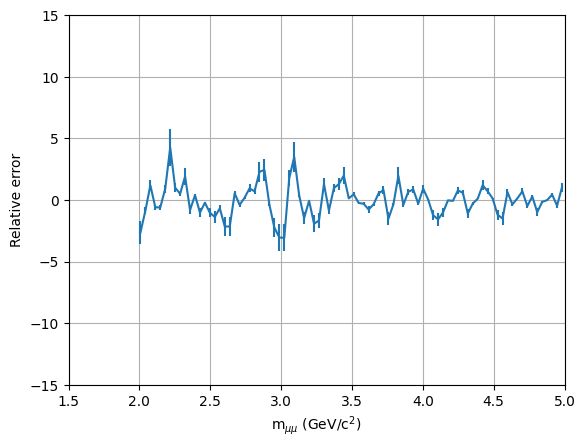

In [37]:
err = np.sqrt(nfev["fvec"]**2/(nfev["nfev"]-len(popt)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [38]:
# Derivatives

def intervals(rel, alphaL, alphaR):
    I1 = rel < -1 * alphaL
    I2 = (rel >= -1 * alphaL) * (rel <= alphaR)
    I3 = rel > alphaR
    return I1, I2, I3


def dcbdN(x, N, mu, sig, alphaL, nL, alphaR, nR):
    if (type(x) is float):
        x = np.array([x])
    rel = (x-mu)/sig
    I1, I2, I3 = intervals(rel, alphaL, alphaR)
    res = np.zeros(np.shape(x))
    res[I1] = ((nL/np.abs(alphaL))**nL*np.exp(-np.abs(alphaL)**2/2)/(nL/np.abs(alphaL) - np.abs(alphaL) - (-mu + x)/sig)**nL)[I1]
    res[I2] = (np.exp(-(-mu + x)**2/(2*sig**2)))                                                                             [I2]
    res[I3] = ((nR/np.abs(alphaR))**nR*np.exp(-np.abs(alphaR)**2/2)/(nR/np.abs(alphaR) - np.abs(alphaR) + (-mu + x)/sig)**nR)[I3]
    return res

def dcbdmu(x, N, mu, sig, alphaL, nL, alphaR, nR):
    if (type(x) is float):
        x = np.array([x])
    rel = (x-mu)/sig
    I1, I2, I3 = intervals(rel, alphaL, alphaR)
    res = np.zeros(np.shape(x))
    res[I1] = (-N*nL*(nL/np.abs(alphaL))**nL*np.exp(-np.abs(alphaL)**2/2)/(sig*(nL/np.abs(alphaL) - np.abs(alphaL) - (-mu + x)/sig)*(nL/np.abs(alphaL) - np.abs(alphaL) - (-mu + x)/sig)**nL)) [I1]
    res[I2] = (-N*(2*mu - 2*x)*np.exp(-(-mu + x)**2/(2*sig**2))/(2*sig**2)                                                                                                                   ) [I2]
    res[I3] = (N*nR*(nR/np.abs(alphaR))**nR*np.exp(-np.abs(alphaR)**2/2)/(sig*(nR/np.abs(alphaR) - np.abs(alphaR) + (-mu + x)/sig)*(nR/np.abs(alphaR) - np.abs(alphaR) + (-mu + x)/sig)**nR) ) [I3]
    return res

def dcbdsig(x, N, mu, sig, alphaL, nL, alphaR, nR):
    if (type(x) is float):
        x = np.array([x])
    rel = (x-mu)/sig
    I1, I2, I3 = intervals(rel, alphaL, alphaR)
    res = np.zeros(np.shape(x))
    res[I1] = (-N*nL*(nL/np.abs(alphaL))**nL*(-mu + x)*np.exp(-np.abs(alphaL)**2/2)/(sig**2*(nL/np.abs(alphaL) - np.abs(alphaL) - (-mu + x)/sig)*(nL/np.abs(alphaL) - np.abs(alphaL) - (-mu + x)/sig)**nL)) [I1]
    res[I2] = (N*(-mu + x)**2*np.exp(-(-mu + x)**2/(2*sig**2))/sig**3                                                                                                                                     ) [I2]
    res[I3] = (N*nR*(nR/np.abs(alphaR))**nR*(-mu + x)*np.exp(-np.abs(alphaR)**2/2)/(sig**2*(nR/np.abs(alphaR) - np.abs(alphaR) + (-mu + x)/sig)*(nR/np.abs(alphaR) - np.abs(alphaR) + (-mu + x)/sig)**nR) ) [I3]
    return res

def IdcbdN(x, *args):
    return quad(dcbdN, start, stop, args=args)[0]

def Idcbdmu(x, N, mu, sig, alphaL, nL, alphaR, nR):
    return quad(dcbdmu, start, stop, args=args)[0]

def Idcbdsig(x, N, mu, sig, alphaL, nL, alphaR, nR):
    return quad(dcbdsig, start, stop, args=args)[0]

def sig2cb(pcov, x, N, mu, sig, alphaL, nL, alphaR, nR):
    return IdcbdN(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * pcov[0,0]
    +Idcbdmu(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * pcov[1,1]
    +Idcbdsig(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * pcov[2,2]
    +2*IdcbdN(x, N, mu, sig, alphaL, nL, alphaR, nR)*Idcbdmu(x, N, mu, sig, alphaL, nL, alphaR, nR) * np.sqrt(pcov[0, 1])
    +2*IdcbdN(x, N, mu, sig, alphaL, nL, alphaR, nR)*Idcbdsig(x, N, mu, sig, alphaL, nL, alphaR, nR) * np.sqrt(pcov[0, 2])
    +2*Idcbdmu(x, N, mu, sig, alphaL, nL, alphaR, nR)*Idcbdsig(x, N, mu, sig, alphaL, nL, alphaR, nR) * np.sqrt(pcov[1, 2])
    
N_JPsi = quad(fixedFunc_JPsi, start, stop, args = (*popt[:3], ))[0] / ((stop - start)/bins)
err_JPsi = np.sqrt(sig2cb(pcov[:3, :3], x_data, *popt[:3], *popt_JPsi[3:])) / ((stop - start)/bins)
print(r"N_JPsi = ", N_JPsi, " +/- ", err_JPsi)

N_JPsi =  54861.19541682228  +/-  546.198070953057


/tmp/ipykernel_7952/702439652.py:18: RuntimeWarning: invalid value encountered in power
  res[I3] = ((nR/np.abs(alphaR))**nR*np.exp(-np.abs(alphaR)**2/2)/(nR/np.abs(alphaR) - np.abs(alphaR) + (-mu + x)/sig)**nR)[I3]
/tmp/ipykernel_7952/702439652.py:16: RuntimeWarning: invalid value encountered in power
  res[I1] = ((nL/np.abs(alphaL))**nL*np.exp(-np.abs(alphaL)**2/2)/(nL/np.abs(alphaL) - np.abs(alphaL) - (-mu + x)/sig)**nL)[I1]
